<a href="https://colab.research.google.com/github/yoonyerin/anomaly-detection/blob/main/anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### *Mounting my Google Drive with the Final Project*

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Task1**

Implement data load function for fixed length (10 pts)

### *csv fixed length data preprocessing*

In [ ]:
#filename="/content/drive/MyDrive/Colab bigdatasecurity/data_fixedlength/train.csv"

In [ ]:
def data_load_fixed(filename):
  import pandas as pd       
  data = pd.read_csv(filename)
  datas = pd.DataFrame(data) 
  datas.columns = list(data.columns)
  datas['class'] = data['class']
  data_drop = datas.drop('class',axis=1)
  X=data_drop
  Y=datas['class']
  return datas, X, Y

### *json fixed length data preprocessing*

csv 파일을 json 파일로 전환 후 전처리 -> 속도 향상

In [ ]:
#jfilename="/content/drive/MyDrive/Colab bigdatasecurity/data_fixedlength/train.json"#유진
filename="/content/drive/MyDrive/Colab Notebooks/bigdata/train.csv"#예린

In [ ]:
# 하나의 파일에 대해 csv -> json
def csv_to_json_1(foldername, filename):
  import glob,os
  import csv
  import json
  
  jsonArray=[]
  get_name = filename.split("/")[-1].replace(".csv",".json")
  with open(filename, 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader :
      jsonArray.append(row)

  saving_path = os.path.join(foldername,get_name)

  with open(saving_path , 'w') as jsonfile:       
    jsonString = json.dumps(jsonArray)
    jsonfile.write(jsonString)

# convert 완료
# csv_to_json_1('/content/drive/MyDrive/Colab bigdatasecurity/data_fixedlength/', filename)

In [ ]:
# json fixed data 전처리
def jdata_load_fixed(jfilename):
  import pandas as pd       # pandas DataFrame : 2차원으로 변환
  data = pd.read_json(jfilename)
  data.columns = list(data.columns)
  data_drop = data.drop('class',axis=1)
  X=data_drop
  Y=data['class']
  return data, X, Y

## **Task2**

Implement data load function for variable length (25 pts)

### *csv variable length data preprocessing*

In [ ]:
foldername="/content/drive/MyDrive/Colab bigdatasecurity/data"

# Vaiation data를 로드하는 함수이다.

## 1) OS를 이용하여 csv형태의 데이터를 로드한다. class0과 class1의 개수를 원하는 만큼 패러미터로 지정해서 불러올 수 있다.

## 2) Glob을 이용하여 폴더의 모든 파일을 가져온다.

## 3) Glob을 이용하여 Class 0과 Class 1의 파일을 원하는 개수 N만큼 가져온다.

### *json variable length data preprocessing*

csv 파일을 json 파일로 전환 후 전처리 -> 속도 향상

In [ ]:
# csv file들을 모두 json 형태로 convert하기
def csv_to_json(foldername, jfoldername):
  import glob,os
  import csv
  import json
  
  all_files= glob.glob(foldername + "/*.csv")

  for file in all_files :
    jsonArray=[]
    get_name = file.split("/")[-1].replace(".csv",".json")
    with open(file, 'r', newline='') as csvfile:
      reader = csv.DictReader(csvfile, delimiter=',')
      for row in reader :
        jsonArray.append(row)

    saving_path = os.path.join(jfoldername,get_name)

    with open(saving_path , 'w') as jsonfile:       
        jsonString = json.dumps(jsonArray)
        jsonfile.write(jsonString)

# csv_to_json(foldername, jfoldername)
# jfoldername 폴더 안에 모든 파일 convert 완료

In [ ]:
#Json용 폴더 경로 넣기
jfoldername='/content/drive/MyDrive/data_json'

In [ ]:
#Json으로 바꾸기
#1) 
def variable_length_data_load_os(class_0, class_1):
  path_dir = r'/content/drive/MyDrive/Colab Notebooks/bigdata/variable_data/data (1)/data'
  file_style_0=r'0_'
  file_style_1=r'1_'
  file_list_0 = [os.path.join(path_dir, file) for file in os.listdir(path_dir) if file.startswith(file_style_0)]
  file_list_1= [os.path.join(path_dir, file) for file in os.listdir(path_dir) if file.startswith(file_style_1)]
  data=pd.DataFrame()

  for i in range(class_0): 
    file_0=pd.read_csv(file_list_0[i])
    file_0=pd.DataFrame(file_0)
    list_0=[]
    for i in range(len(file_0[0:])):
      list_0.append(0)
    list_0=pd.Series(list_0, name="class")
    file_0=pd.concat([file_0, list_0], axis=1)
    data=pd.concat([data, file_0], axis=0)

  for i in range(class_1):
    file_1=pd.read_csv(file_list_1[i])
    file_1=pd.DataFrame(file_1)
    list_1=[]
    for i in range(len(file_1[0:])):
      list_1.append(1)
    list_1=pd.Series(list_1, name="class")
    file_1=pd.concat([file_1, list_1], axis=1)
    data=pd.concat([data, file_1], axis=0)
  return data

def data_load_all(foldername):
  import pandas as pd
  import glob
  import numpy as np

  all_files_0 = glob.glob(foldername + "/0_*")
  all_files_1 = glob.glob(foldername + "/1_*")
  all_files = [all_files_0, all_files_1]
  filenames = np.array(all_files)
  frames = []
  for i in [0,1] :
    for filename in filenames[i] :
      data = pd.read_csv(filename)
      datas = pd.DataFrame(data.iloc[:, 0:])
      datas.columns = list(data.iloc[:, 0:].columns)
      datas.insert(0, 'class', i)
      frames.append(datas)
  result = pd.concat(frames, ignore_index = True)
  return result
def data_load_var(foldername, n):
  import pandas as pd       # pandas DataFrame : 2차원으로 변환
  import glob
  import numpy as np
  
  all_files_0 = glob.glob(foldername + "/0_*.csv")
  all_files_1 = glob.glob(foldername + "/1_*.csv")
  all_files = [all_files_0[0:n], all_files_1[0:n]]
  filenames = np.array(all_files)
  frames = []
  for i in [0,1] :
    for filename in filenames[i] :
      data = pd.read_csv(filename)
      datas = pd.DataFrame(data.iloc[:, 0:])
      datas.columns = list(data.iloc[:, 0:].columns)
      datas.insert(0, 'class', i)
      frames.append(datas)
  result = pd.concat(frames, ignore_index = True)
  return result

# data_load_all(foldername)
# 너무 느려서 전체 데이터에 대해서는 json으로!

In [ ]:
#OS로 바꾸기 => Json사용 함수
import pandas as pd
import glob
import numpy as np
import os
def jdata_load_all(path_dir):    
  file_style_0=r'0_'
  file_style_1=r'1_'
  file_list_0 = [os.path.join(path_dir, file) for file in os.listdir(path_dir) if file.startswith(file_style_0)]
  file_list_1= [os.path.join(path_dir, file) for file in os.listdir(path_dir) if file.startswith(file_style_1)]
  filenames=[file_list_0[0:100], file_list_1[0:100]]
  data=pd.DataFrame()
  for i in [0, 1]:
    for file_name in filenames[i]:
      file=pd.read_json(file_name)
      file=pd.DataFrame(file)
      '''
      list_class=[]
      list_class.append(i)
      list_class=pd.Series(list_class, name="class")
      '''
      file.insert(0, 'class', i)
      data=pd.concat([data, file], axis=0)
          
  return data
  

'''  all_files_0 = glob.glob(foldername + "/0_*.json")
  all_files_1 = glob.glob(foldername + "/1_*.json")
  all_files = [all_files_0, all_files_1]
  filenames = np.array(all_files)
  frames = []
  for i in [0,1] :
    for filename in filenames[i] :
      data = pd.read_json(filename)
      data.columns = list(data.columns)
      data.insert(0, 'class', i)
      frames.append(data)
  result = pd.concat(frames, ignore_index = True)
  '''


'  all_files_0 = glob.glob(foldername + "/0_*.json")\n  all_files_1 = glob.glob(foldername + "/1_*.json")\n  all_files = [all_files_0, all_files_1]\n  filenames = np.array(all_files)\n  frames = []\n  for i in [0,1] :\n    for filename in filenames[i] :\n      data = pd.read_json(filename)\n      data.columns = list(data.columns)\n      data.insert(0, \'class\', i)\n      frames.append(data)\n  result = pd.concat(frames, ignore_index = True)\n  '

Case1. 100개의 파일씩 가져온다.

In [ ]:
data_v = data_load_var(jfoldername, 100)

ValueError: ignored

In [ ]:
Case2. Data를 전부 끌고 온다.

In [ ]:
original_data=jdata_load_all(jfoldername)

## **Task3**, **Task4**

Implement K-means clustering or any ML algorithms (25 pts)

### *1-1) Kmeans clustering for fixed length data*

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
def get_clf_eval(y_test, pred=None):
  confusion=confusion_matrix(y_test, pred)
  accuracy=accuracy_score(y_test, pred)
  precision=precision_score(y_test, pred)
  recall=recall_score(y_test, pred)
  f1=f1_score(y_test, pred)
  print("오차 행렬")
  print(confusion)
  print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
  F1:{3:.4f}".format(accuracy, precision, recall, f1))

class  kmeans_label
0      0               3870
       1                  4
1      0               2517
Name: kmeans_label, dtype: int64
[0 1]


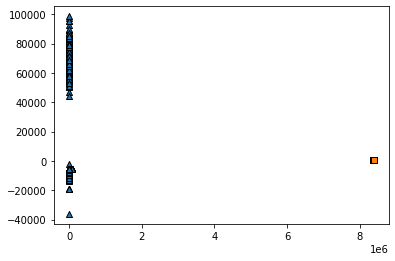

In [ ]:
# K-means clustering (fixed length)

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#데이터 로드
data_f, data_f_x, data_f_y= data_load_fixed(filename)

#kmeans fitting
kmeans_f = KMeans(n_clusters=2)
#f_kmeans=KMeans(n_clusters=2, init="k-means++", max_iter=300, random_state=0)
kmeans_f.fit(datas_f)

#kmeans예측 결과를 데이터 프레임에 컬럼으로 넣어준다.
k_data_f=data_f.copy()
k_data_f["kmeans_label"]=kmeans_f.labels_

#kmeans 결과 확인
kmeans_f_result=k_data_f.groupby(["class"])["kmeans_label"].value_counts()
print(kmeans_f_result)

#PCA
pca_f = PCA(n_components=2)
pca_ft = pca_f.fit_transform(data_f_x)
k_data_f["pca_x"]=pca_ft[:,0]
k_data_f["pca_y"]=pca_ft[:,1]
#result_f = pd.DataFrame(data = pca_f, columns = ['x', 'y'])

#생각나면 수정 // 아니면 지우기!
'''
sns.scatterplot(
    x = 'x', y = 'y',
    hue = "cluster",
    data = result_f,
    palette = "Set2"
)

'''

#Plotting
target_list=np.unique(data_f["class"])
print(target_list)
markers=['^', 's']
for target in target_list:
  target_cluster=k_data_f[k_data_f["kmeans_label"]==target]
  plt.scatter(x=target_cluster["pca_x"], y=target_cluster["pca_y"], edgecolor="k", marker=markers[target])
plt.show()
#고정값 사이사이에 있는 600 등의 이상치 때문일 것으로 보인다.
#왜 이런 결과가..=> 이 결과가 맞는가???=>생각하는 step들을 알아가자!!!


### *1-2) ML Algorithms for fixed length data*

#### (1) SVM Model

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn.metrics import accuracy_score

#train, validation, test로 나누기
f_x_train, f_x_test, f_y_train, f_y_test = train_test_split(data_f_x, data_f_y, test_size=0.1, random_state = 0)
f_x_train, f_x_valid, f_y_train, f_y_valid=train_test_split(f_x_train, f_y_train, test_size=0.1, random_state=0)

clf = Sequential()
clf = SVC(gamma='auto')
clf.fit(f_x_train, f_y_train)
predict = clf.predict(f_x_test)
get_clf_eval(f_y_test, predict)

오차 행렬
[[400   0]
 [ 56 184]]
정확도: 0.9125, 정밀도: 1.0000, 재현율: 0.7667,  F1:0.8679


#### (2) LGBM Model

In [ ]:
#LGBM
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=400)

evals=[(f_x_test, f_y_test)]
lgbm_wrapper.fit(f_x_train, f_y_train)
#lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds=lgbm_wrapper.predict(f_x_test)
get_clf_eval(f_y_test, preds)
#score = accuracy_score(f_y_test, preds)
#print('lgbm prediction score : %s' %score)

오차 행렬
[[400   0]
 [  1 239]]
정확도: 0.9984, 정밀도: 1.0000, 재현율: 0.9958,  F1:0.9979


"score = accuracy_score(f_y_test, preds)\nprint('lgbm prediction score : %s' %score)"

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(f_x_train, f_y_train)
pred=rf_clf.predict(f_x_test)
#accuracy=accuracy_score(f_y_test, pred)
#print("Random Forest score: {0:.4f}".format(accuracy))
get_clf_eval(f_y_test, pred)

오차 행렬
[[400   0]
 [  1 239]]
정확도: 0.9984, 정밀도: 1.0000, 재현율: 0.9958,  F1:0.9979


#### (3) Keras Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

dim = len(data_f_x.columns)
model = Sequential()
model.add(Dense(2*dim, input_dim=dim, activation='relu'))
model.add(Dense(dim, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#binary_crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
history=model.fit(f_x_train, f_y_train, epochs=10, batch_size=10, validation_data=(f_x_valid, f_y_valid))



Epoch 1/10
518/518 [==============================] - 5s 5ms/step - loss: 1321.3914 - accuracy: 0.9675 - val_loss: 280.7547 - val_accuracy: 0.9913
Epoch 2/10
518/518 [==============================] - 2s 4ms/step - loss: 207.0832 - accuracy: 0.9867 - val_loss: 1137.4840 - val_accuracy: 0.9965
Epoch 3/10
518/518 [==============================] - 2s 5ms/step - loss: 978.9437 - accuracy: 0.9845 - val_loss: 1457.2708 - val_accuracy: 0.9931
Epoch 4/10
518/518 [==============================] - 2s 4ms/step - loss: 1118.5532 - accuracy: 0.9867 - val_loss: 0.2373 - val_accuracy: 0.9948
Epoch 5/10
518/518 [==============================] - 3s 5ms/step - loss: 2070.9705 - accuracy: 0.9867 - val_loss: 740.4728 - val_accuracy: 0.9913
Epoch 6/10
518/518 [==============================] - 2s 5ms/step - loss: 170.6039 - accuracy: 0.9911 - val_loss: 0.0844 - val_accuracy: 0.9983
Epoch 7/10
518/518 [==============================] - 2s 5ms/step - loss: 47.8186 - accuracy: 0.9961 - val_loss: 0.5079 - v

In [ ]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

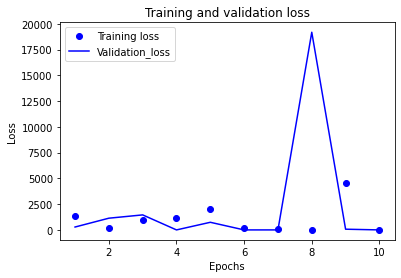

In [ ]:
import matplotlib.pyplot as plt

acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]

epochs=range(1, len(acc)+1)
plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation_loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


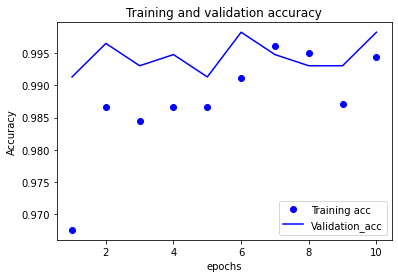

In [ ]:
plt.clf()

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation_acc")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
#predict 한번 해보기 (group by)  //서칭하기~~

loss, accuracy = model.evaluate(f_x_test, f_y_test, verbose=0)
print("loss: ", loss, "accuracy: ", accuracy)

loss:  0.0 accuracy:  1.0


### *2-1) Kmeans clustering for variable length data*

In [ ]:
# K-means clustering (variable length)

# from sklearn.preprocessing import scale #전처리 package
from sklearn.cluster import KMeans      # Kmeans package
from sklearn.decomposition import PCA   # 차원 축소
import numpy as np
import seaborn as sns
import pandas as pd

#함수로 합치기~~~~

# column 많은 상태에서 KMEANS -> PCA해서 그 상태에서 plotting
#PCA=>Kmeans(해보렴~)

kmeans=KMeans(n_clusters=2)             # n개로 cluster
kmeans.fit(data_x)

pca = PCA(n_components=2)               # 2차원으로 차원 축소
pca_result = pca.fit_transform(data_x)
result = pd.DataFrame(data = pca_result, columns = ['x', 'y'])

final_result = result.copy()
final_result["cluster"] = kmeans.labels_
final_result.head()

sns.scatterplot(
    x = 'x', y = 'y',
    hue = "cluster",
    data = final_result,
    palette = "Set2"
)

KeyboardInterrupt: ignored

In [ ]:
data["kmeans_label"]=final_result["cluster"]

NameError: ignored

In [ ]:
v_kmeans_result = data.groupby(["class", "kmeans_label"])["Length"].count()
print(v_kmeans_result)

class  kmeans_label
0      0               13822
       1                9009
1      0                3568
Name: Length, dtype: int64


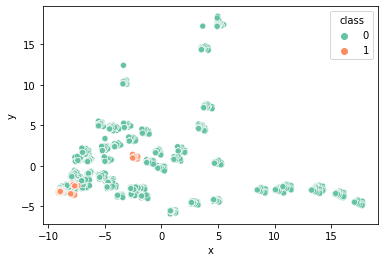

In [ ]:
#별로인 모습 보여주기
data = data.fillna(-1)
pca2 = PCA(n_components = 2)
pca2_result = pca.fit_transform(data.values)
result2 = pd.DataFrame(data = pca_result, columns = ['x', 'y'])
final_result2 = result2.copy()
final_result2["class"] = data["class"]
sns.scatterplot(
    x = 'x', y='y',
    hue = "class",
    data = final_result2,
    palette="Set2"
)


### *2-2) ML Algorithms for variable length data*

** tsne를 한 후에 ML model 적용해보기

#### (1) SVM Model

In [ ]:

#수정 !!! 1.0 이상해!!!!
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.4, random_state = 0)

clf = Sequential()
clf = SVC(gamma='auto')
clf.fit(x_train, y_train)
predict = clf.predict(x_test)
#score = accuracy_score(y_test, predict)
#print(score)   # 왜 1.0이 나오지...?
# => TSNE 적용 후 해보기
predict

In [ ]:
print(predict)
print(y_test)

In [ ]:
#TSNE 수정 
from sklearn.manifold import TSNE

model = TSNE(n_components=2)
tsne_data = model.fit_transform(data_x)

Visualize clustering or hidden representation of ML algorithm results (20 pts)

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
warnings.filterwarnings("ignore")

rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred=rf_clf.predict(x_test)
accuracy=accuracy_score(y_test, pred)
print("Random Forest score: {0:.4f}".format(accuracy))
